In [42]:
import pandas as pd
import warnings
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import matplotlib
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import itertools
from sklearn.utils import resample

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import joypy
from matplotlib import cm
import scipy.stats


In [19]:
pip install joypy

Note: you may need to restart the kernel to use updated packages.


In [20]:
dfWeather=pd.read_csv("WeatherDF.csv")
dfWeather = dfWeather.set_index('fullDate')

In [21]:
dfWeather

,year,month,day,hour,temp_c,feelslike_c,wind_mph,humidity,pressure_in,dewpoint_c,chance_of_rain,season,city
fullDate,,,,,,,,,,,,,
2010-01-01 07:00:00,2010,1,1,07:00,17.2,17.2,6.4,83,30.6,14.4,1,winter,herzliya
2010-01-01 07:00:00,2010,1,1,07:00,17.1,17.1,6.0,84,30.6,14.4,1,winter,Hod HaSharon
2010-01-01 07:00:00,2010,1,1,07:00,16.9,16.9,6.2,83,30.6,14.0,1,winter,rishon le zion
2010-01-01 07:00:00,2010,1,1,07:00,17.1,17.1,6.0,84,30.6,14.4,1,winter,petah tiqva
2010-01-01 07:00:00,2010,1,1,07:00,16.1,16.1,4.0,89,30.6,14.2,3,winter,afula
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 20:00:00,2020,12,31,20:00,19.8,19.8,4.1,60,30.5,11.7,1,winter,Tel Aviv
2020-12-31 20:00:00,2020,12,31,20:00,14.8,14.8,4.6,63,30.5,7.9,1,winter,Jerusalem
2020-12-31 20:00:00,2020,12,31,20:00,17.8,17.8,3.0,61,30.5,10.2,1,winter,Kfar Saba


Text(0.5, 1.0, 'Humidity VS mean temperature in Eilat')

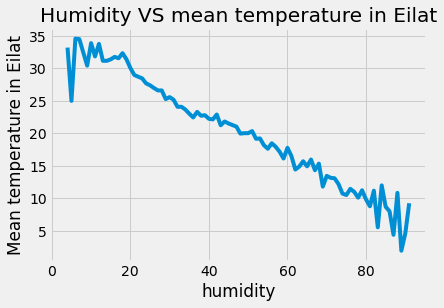

In [22]:
dfWeather.loc[(dfWeather['city']=='eilat')].groupby('humidity').temp_c.mean().plot(kind='line')
plt.ylabel('Mean temperature in Eilat')
plt.title("Humidity VS mean temperature in Eilat")

Text(0.5, 1.0, 'Humidity VS mean temperature in Haifa')

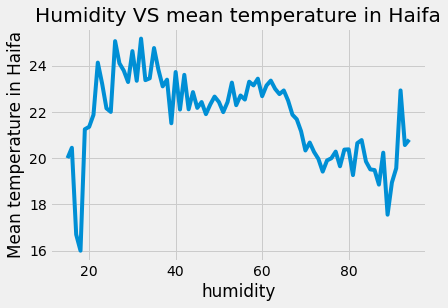

In [23]:
dfWeather.loc[(dfWeather['city']=='Haifa')].groupby('humidity').temp_c.mean().plot(kind='line')
plt.ylabel('Mean temperature in Haifa')
plt.title("Humidity VS mean temperature in Haifa")

In [25]:
print( "The coefficients between two variables - humidity and temperature : " +
      str(abs(dfWeather['temp_c'].corr(dfWeather['humidity']))))

The coefficients between two variables - humidity and temperature : 0.35418781811113575


Text(0.5, 1.0, 'wind (mph) VS mean temperature in Jerusalem')

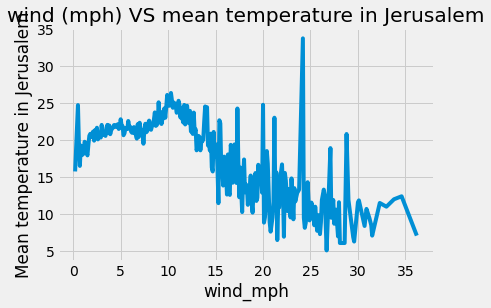

In [26]:
dfWeather.loc[(dfWeather['city']=='Jerusalem')].groupby('wind_mph').temp_c.mean().plot(kind='line')
plt.ylabel('Mean temperature in Jerusalem')
plt.title("wind (mph) VS mean temperature in Jerusalem")

In [28]:
print( "The coefficients between two variables - wind speed and temperature : " +
      str(abs(dfWeather['temp_c'].corr(dfWeather['wind_mph']))))

The coefficients between two variables - wind speed and temperature : 0.035224821466170446


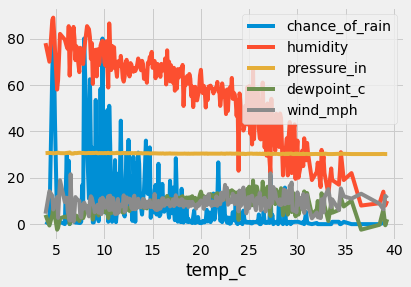

In [32]:
Weather=dfWeather.loc[(dfWeather['year']==2020)&(dfWeather['month']<6)&(dfWeather['day']>20)].groupby(['temp_c']).mean()[['chance_of_rain','humidity','pressure_in','dewpoint_c','wind_mph']]
Weather.plot().legend(loc='upper right', ncol=1)

Text(0.5, 0, 'Temperature (C)')

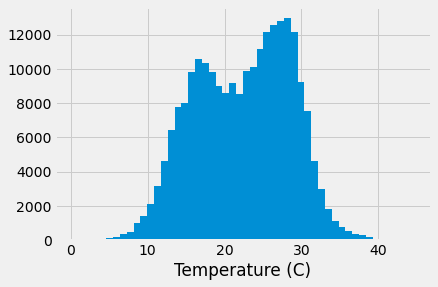

In [35]:
#שכיחות הטמפ' בערים
plt.hist(dfWeather["temp_c"], bins=50)
plt.xlabel('Temperature (C)')

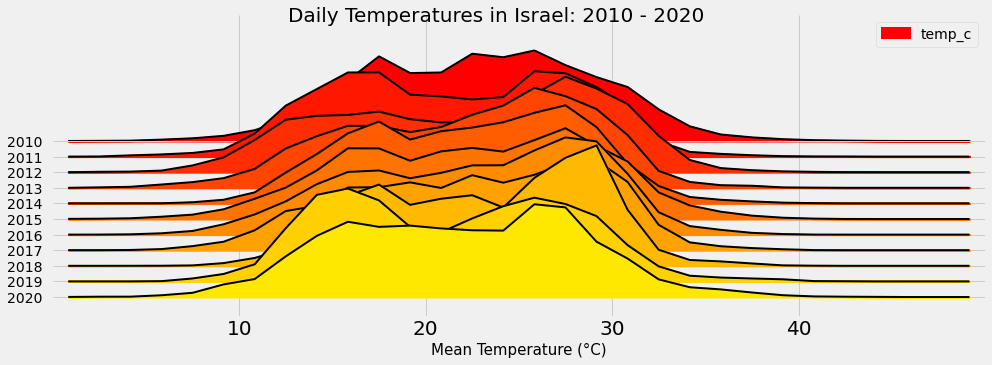

In [38]:

fig, axes = joypy.joyplot(dfWeather, by="year", column="temp_c",
                   kind="normalized_counts", bins=30,
                   range_style='all', x_range=[0, 50],
                   overlap=2, linewidth=2, colormap=cm.autumn,
                   legend = True,
                   ylabelsize = 14, xlabelsize = 20, 
                   labels=dfWeather.year.unique(), grid='both', figsize=(14,5),
                   )
fig.suptitle("Daily Temperatures in Israel: 2010 - 2020", fontsize=20)
plt.xlabel("Mean Temperature (°C)", fontsize=15)
plt.ylabel("Year", fontsize=15)
plt.show()


(-0.6553600324642166, 0.0)

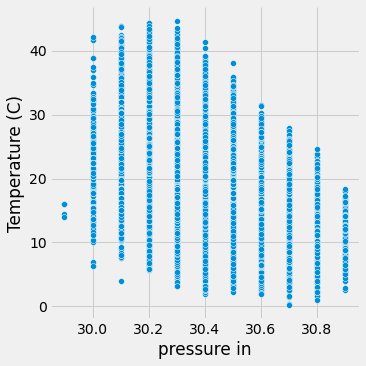

In [48]:
sns.relplot(x='pressure_in', y='temp_c', data=dfWeather)
plt.ylabel('Temperature (C)')
plt.xlabel('pressure in')
scipy.stats.pearsonr(dfWeather["pressure_in"], dfWeather["temp_c"])

Text(0.5, 0, 'Temperature (C)')

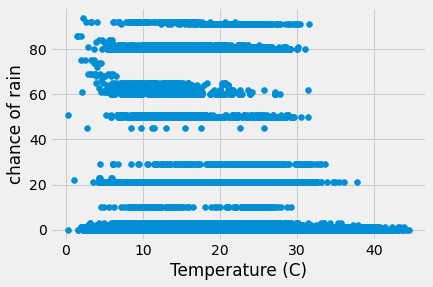

In [49]:
plt.scatter(dfWeather["temp_c"], dfWeather["chance_of_rain"])
scipy.stats.pearsonr(dfWeather["temp_c"], dfWeather["chance_of_rain"])
plt.ylabel('chance of rain')
plt.xlabel('Temperature (C)')

(0.6390179020931128, 0.0)

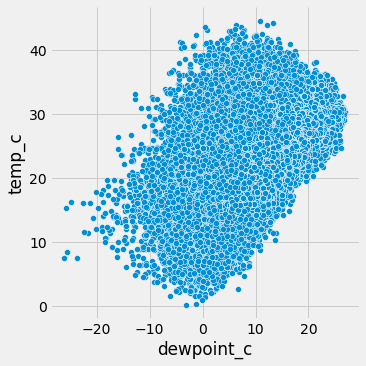

In [50]:
sns.relplot(x='dewpoint_c', y='temp_c', data=dfWeather)
scipy.stats.pearsonr(dfWeather["dewpoint_c"], dfWeather["temp_c"])

(-0.03522482146617045, 1.8980332369521635e-65)

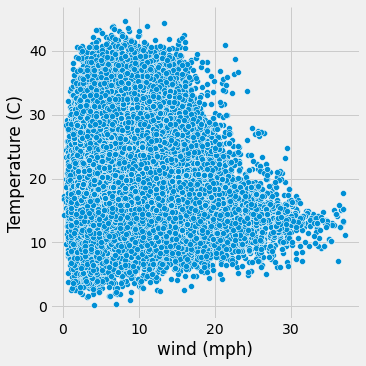

In [46]:
sns.relplot(x='wind_mph', y='temp_c', data=dfWeather)
plt.ylabel('Temperature (C)')
plt.xlabel('wind (mph)')
scipy.stats.pearsonr(dfWeather["wind_mph"], dfWeather["temp_c"])

(-0.354187818111136, 0.0)

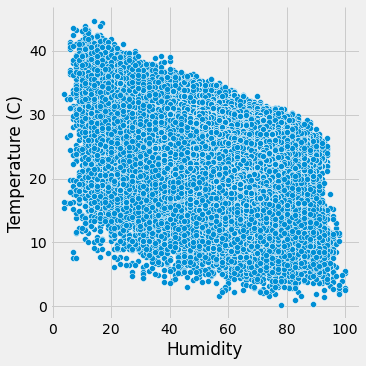

In [47]:
sns.relplot(x='humidity', y='temp_c', data=dfWeather)
plt.ylabel('Temperature (C)')
plt.xlabel('Humidity')
scipy.stats.pearsonr(dfWeather["humidity"], dfWeather["temp_c"])

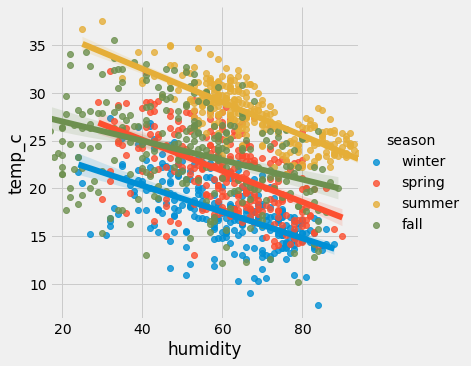

In [51]:
#פחות או יותר הלחות לאורך כל השנה מתפזרת באופן זהה
sns.lmplot(x='humidity', y='temp_c', hue='season', data=dfWeather.loc[(dfWeather.city=='Holon')&(dfWeather.year==2010)])

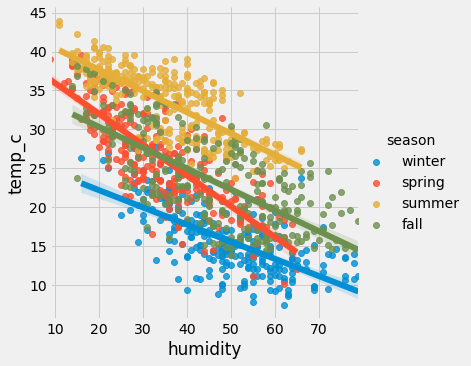

In [52]:
sns.lmplot(x='humidity', y='temp_c', hue='season', data=dfWeather.loc[(dfWeather.city=='eilat')&(dfWeather.year==2020)])

Text(0.5, 0, 'pressure in')

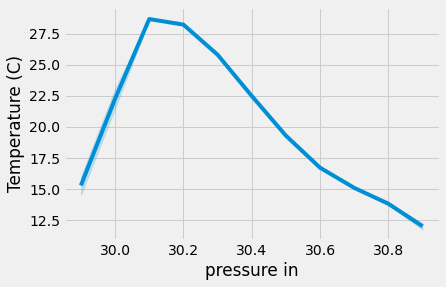

In [54]:
sns.lineplot(x='pressure_in', y='temp_c',  data=dfWeather)
plt.ylabel('Temperature (C)')
plt.xlabel('pressure in')

(-0.30016378375094466, 0.0)

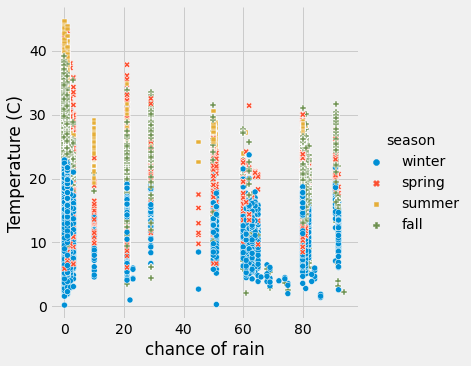

In [55]:

sns.relplot(x='chance_of_rain', y='temp_c', data=dfWeather, hue='season', style='season')
plt.ylabel('Temperature (C)')
plt.xlabel('chance of rain')
scipy.stats.pearsonr(dfWeather["chance_of_rain"], dfWeather["temp_c"])


<AxesSubplot:xlabel='chance_of_rain', ylabel='temp_c'>

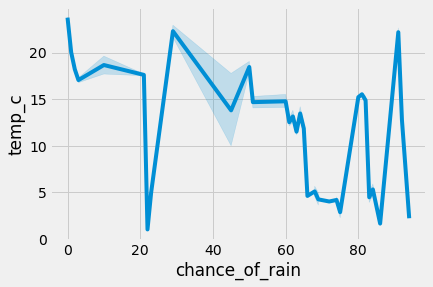

In [56]:
sns.lineplot(x='chance_of_rain', y='temp_c',  data=dfWeather)


(0.9859212221287618, 0.0)

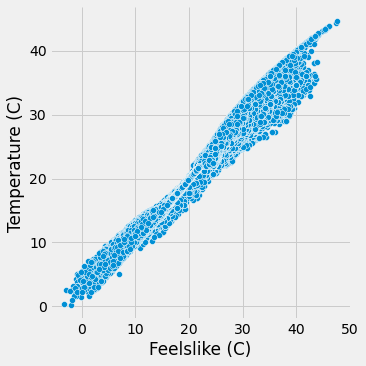

In [57]:
sns.relplot(x='feelslike_c', y='temp_c', data=dfWeather)
plt.ylabel('Temperature (C)')
plt.xlabel('Feelslike (C)')
scipy.stats.pearsonr(dfWeather["feelslike_c"], dfWeather["temp_c"])

(-0.005824336735235141, 0.004739617287983978)

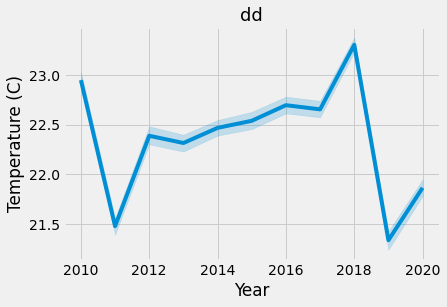

In [58]:
plt.title("dd",fontsize=18)
sns.lineplot(x=dfWeather.year, y=dfWeather['temp_c'],  data=dfWeather, sizes=(10, 10))
plt.ylabel('Temperature (C)')
plt.xlabel('Year')
scipy.stats.pearsonr(dfWeather["year"], dfWeather["temp_c"])

<AxesSubplot:xlabel='humidity', ylabel='temp_c'>

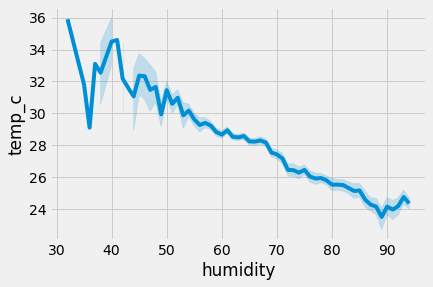

In [59]:
data=dfWeather.loc[(dfWeather.city=='Haifa')&(dfWeather.season=='summer')]
sns.lineplot(x='humidity', y='temp_c',  data=data)

<AxesSubplot:xlabel='humidity', ylabel='temp_c'>

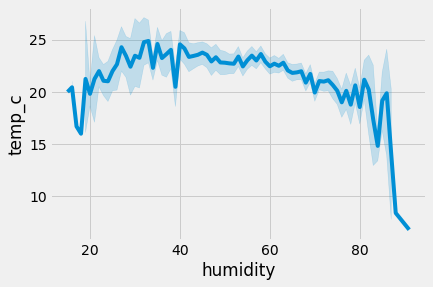

In [60]:
data=dfWeather.loc[(dfWeather.city=='Haifa')&(dfWeather.season=='fall')]
sns.lineplot(x='humidity', y='temp_c',  data=data)

<AxesSubplot:xlabel='humidity', ylabel='temp_c'>

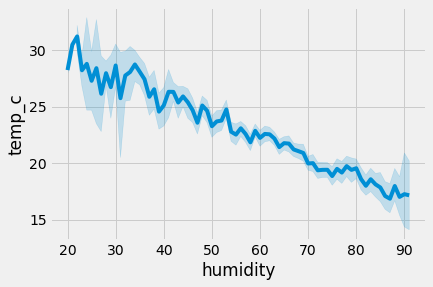

In [61]:
data=dfWeather.loc[(dfWeather.city=='Haifa')&(dfWeather.season=='spring')]
sns.lineplot(x='humidity', y='temp_c',  data=data)

<AxesSubplot:xlabel='temp_c', ylabel='Density'>

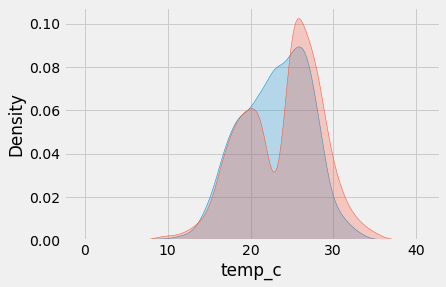

In [62]:
data=dfWeather.loc[(dfWeather.city=='Tel Aviv')&(dfWeather.season=='fall')]
ax = sns.kdeplot(data.temp_c, shade=True)
sns.kdeplot(data.feelslike_c, shade=True)

In [74]:
cities=dfWeather.city.unique()

<AxesSubplot:xlabel='pressure_in', ylabel='temp_c'>

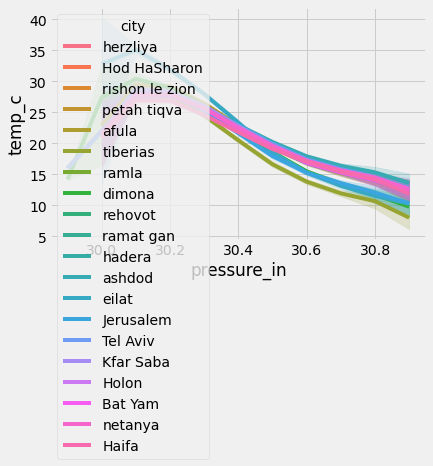

In [77]:
sns.color_palette("Set3")

sns.lineplot(x='pressure_in', y='temp_c',  data=dfWeather , hue="city", ci=100)

<AxesSubplot:xlabel='dewpoint_c', ylabel='temp_c'>

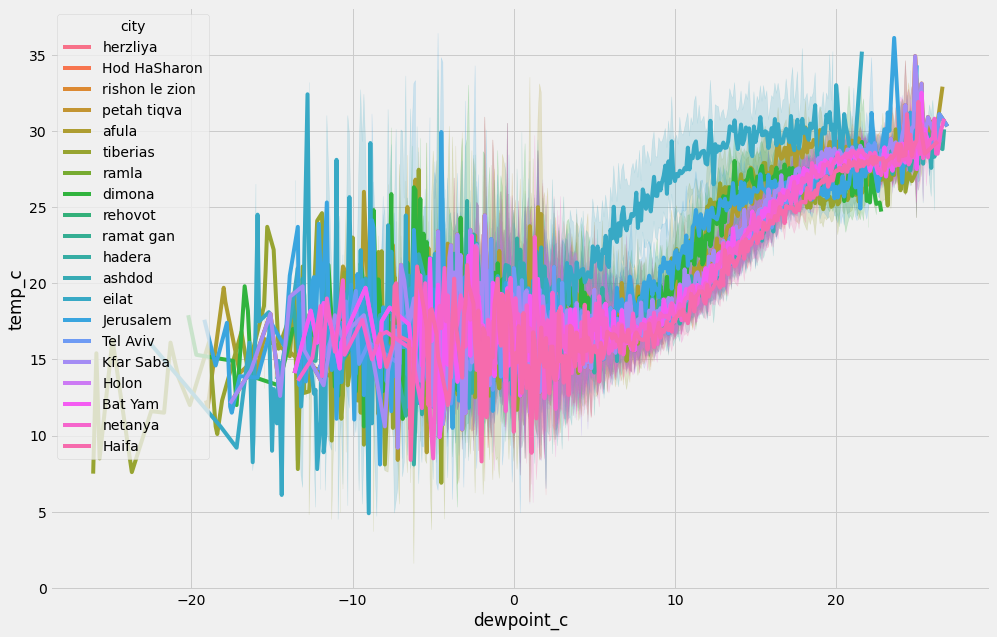

In [90]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.color_palette("Set3")

sns.lineplot(x = "dewpoint_c", y = "temp_c", ax=ax, data=dfWeather, hue="city" , ci=100)


In [88]:
fig.savefig('Dewpoint_relative_to_temperature.png')


In [94]:
sns.set(rc = {'figure.figsize':(15,8)})

<AxesSubplot:xlabel='chance_of_rain', ylabel='temp_c'>

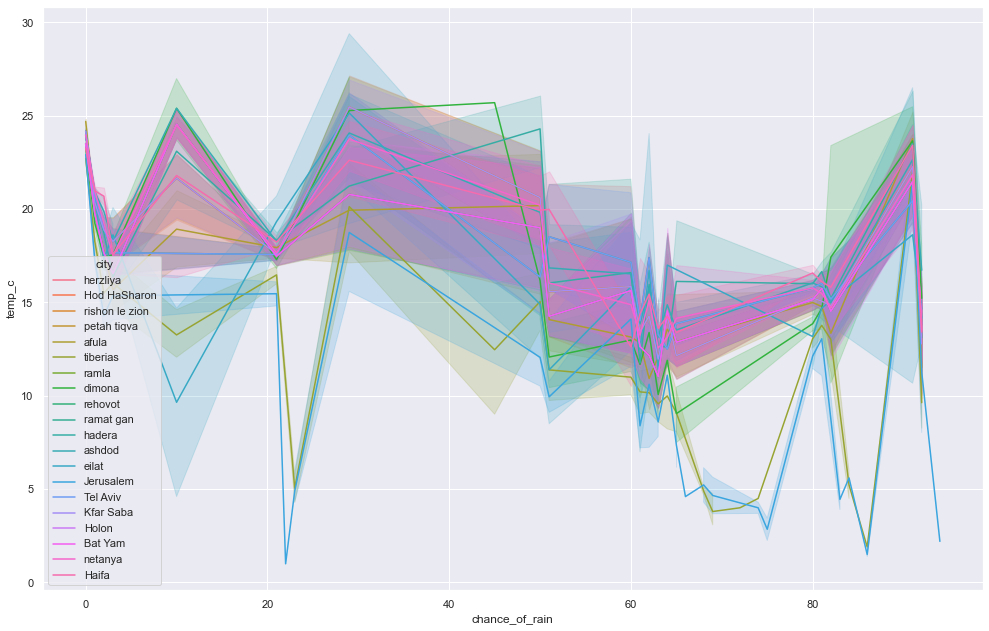

In [95]:

fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.color_palette("Set3")

sns.lineplot(x = "chance_of_rain", y = "temp_c", ax=ax, data=dfWeather, hue="city" )


In [96]:
fig.savefig('chance_of_rain_relative_to_temperature.png')


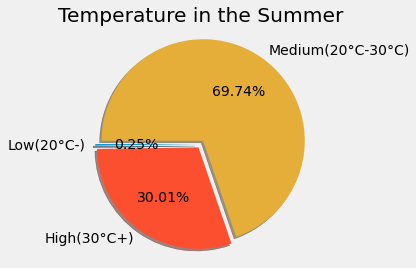

In [69]:
df_summer=dfWeather.loc[(dfWeather.season=='summer')]
df_over_30 = df_summer[df_summer['temp_c']>=30].reset_index(drop=True)
df_20_to_30 = df_summer[(df_summer['temp_c']>=20) & (df_summer['temp_c']<30)].reset_index(drop=True)
df_less_than_20 = df_summer[(df_summer['temp_c']<20)].reset_index(drop=True)
sizes = [  len(df_less_than_20)/len(df_summer)*100  , len(df_over_30)/len(df_summer)*100  , len(df_20_to_30)/len(df_summer)*100]
labels = [ 'Low(20°C-)'  , 'High(30°C+)', 'Medium(20°C-30°C)']
explode = (0.04, 0.04, 0.04)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Temperature in the Summer')
plt.savefig('pie_chart_Temperature_summer.png', transparent = True)
plt.show()

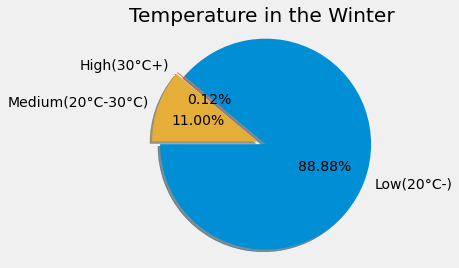

In [70]:
df_summer=dfWeather.loc[(dfWeather.season=='winter')]
df_over_30 = df_summer[df_summer['temp_c']>=30].reset_index(drop=True)
df_20_to_30 = df_summer[(df_summer['temp_c']>=20) & (df_summer['temp_c']<30)].reset_index(drop=True)
df_less_than_20 = df_summer[(df_summer['temp_c']<20)].reset_index(drop=True)
sizes = [  len(df_less_than_20)/len(df_summer)*100  , len(df_over_30)/len(df_summer)*100  , len(df_20_to_30)/len(df_summer)*100]
labels = [ 'Low(20°C-)'  , 'High(30°C+)', 'Medium(20°C-30°C)']
explode = (0.04, 0.04, 0.04)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Temperature in the Winter')
plt.savefig('pie_chart_Temperature_winter.png', transparent = True)
plt.show()

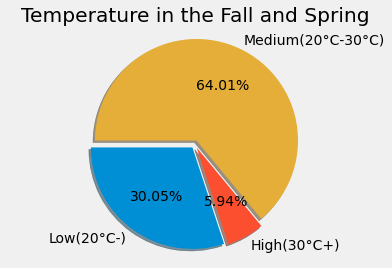

In [71]:
df_summer=dfWeather.loc[(dfWeather.season=='fall')|(dfWeather.season=='spring')]
df_over_30 = df_summer[df_summer['temp_c']>=30].reset_index(drop=True)
df_20_to_30 = df_summer[(df_summer['temp_c']>=20) & (df_summer['temp_c']<30)].reset_index(drop=True)
df_less_than_20 = df_summer[(df_summer['temp_c']<20)].reset_index(drop=True)
sizes = [  len(df_less_than_20)/len(df_summer)*100  , len(df_over_30)/len(df_summer)*100  , len(df_20_to_30)/len(df_summer)*100]
labels = [ 'Low(20°C-)'  , 'High(30°C+)', 'Medium(20°C-30°C)']
explode = (0.04, 0.04, 0.04)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Temperature in the Fall and Spring')
plt.savefig('pie_chart_Temperature_fall_spring.png', transparent = True)
plt.show()

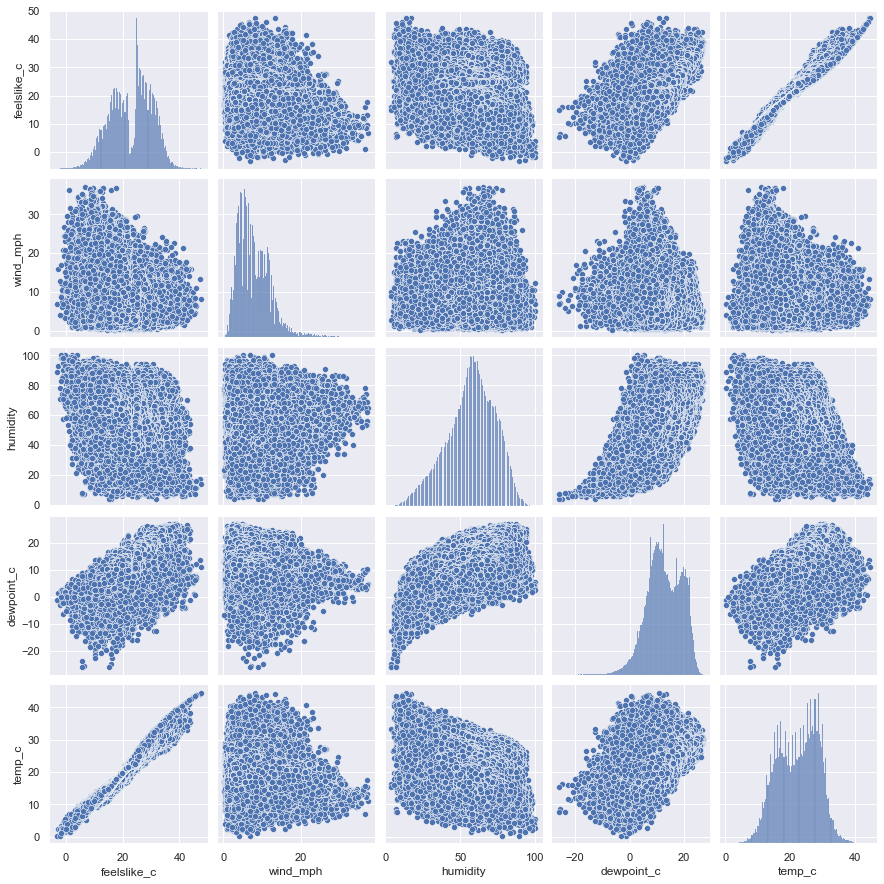

In [97]:
sns.pairplot(dfWeather[[ 'feelslike_c', 'wind_mph',
       'humidity', 'dewpoint_c','temp_c']])